In [17]:
import os
from pprint import pprint
import pandas as pd 
import numpy as np
from nltk import WordNetLemmatizer
from nltk import PorterStemmer
from nltk.corpus import stopwords
from nltk import WordPunctTokenizer
import math
from num2words import num2words
from decimal import Decimal
from word2number import w2n
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 7]
sns.set(style = "darkgrid")

In [18]:
%run functions.ipynb

In [19]:
path = "/IR-assignment-3-data.txt"

data = pd.read_csv(os.getcwd()+path, sep="[a-z]+:|\d+:", header = None, engine = 'python')
    

In [20]:

new_data = data.loc[data[1] == 34]
# print(new_data.iloc[:, 76])  # 75th feature = r/nr, qid, 1, 2, ... 74, 75.
# sort the data on the basis of this col
new_data = new_data.sort_values([76], ascending = False)
# print(new_data.iloc[:, 76])

In [21]:
# print(new_data.iloc[:, 0])
new_data.loc[new_data[0] > 0, 0] = 1 # set 1,2,3,4 to 1
new_data = new_data.reset_index(drop=True)

In [22]:
# print(new_data)

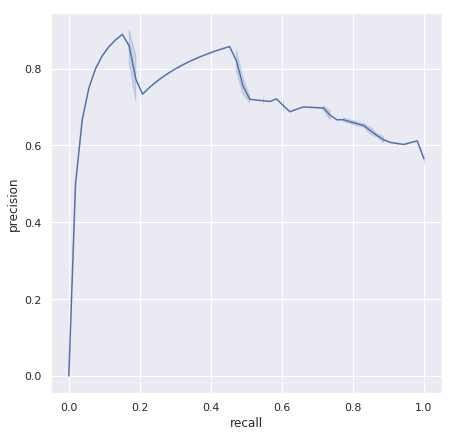

In [23]:
# total no. of relevant docs
r = new_data[0].value_counts()[1]

pr_table = []
ct_rel = 0

for i in range(0, new_data.shape[0]):  # create df from {}
    data_pr = {}
    data_pr['rel'] = new_data.iloc[i, 0]
    
    if(new_data.iloc[i, 0] == 1):
        ct_rel+=1
        data_pr['ct_rel'] = ct_rel
    else:
        data_pr['ct_rel'] = ct_rel
    
    data_pr['recall'] = data_pr['ct_rel']/r
    data_pr['precision'] = data_pr['ct_rel']/(i+1)
    
    pr_table.append(data_pr)
    
pr = pd.DataFrame(pr_table)
sns.lineplot(x = 'recall', y = 'precision', data = pr[['precision', 'recall']])

In [16]:
# print(new_data.iloc[:,76])